In [15]:
import sys
import imp
import smooziee.module.phonon_scattering as ph_scat
import smooziee.module.math_tools as math_tools
imp.reload(ph_scat)
import matplotlib.pyplot as plt

In [16]:
### experimental file name
filename = "PbTe_sq_GX711_p0p25_RT_4"

In [20]:
### find peak and find peak pair
### variables
order = 4
threshold = 5
idx_range = 15

### main
data = ph_scat.Process(filename)
data.find_peak(order=order, notice=False)
# data.add_peak(25, run_mode='add')
data.add_peak(11, run_mode='add')
data.find_peak_pair(threshold=threshold, notice=False)
data.initial_fit(idx_range=idx_range, notice=False)

### plot
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
data.plot(ax1, run_mode='raw_data')
data.plot(ax2, run_mode='peak')
data.plot(ax3)
plt.show()


TypeError: Improper input: N=3 must not exceed M=0

In [13]:
data.peak_idx_lst

[7, 13, 16, 21, 28, 36, 47]

In [414]:
# data.peak_pair_idx_lst.remove([21,25])
print(data.peak_idx_lst)
print(data.peak_pair_idx_lst)

[7, 16, 21, 25, 28, 36, 47, 55]
[[7, 36], [16, 28], [21, 25]]


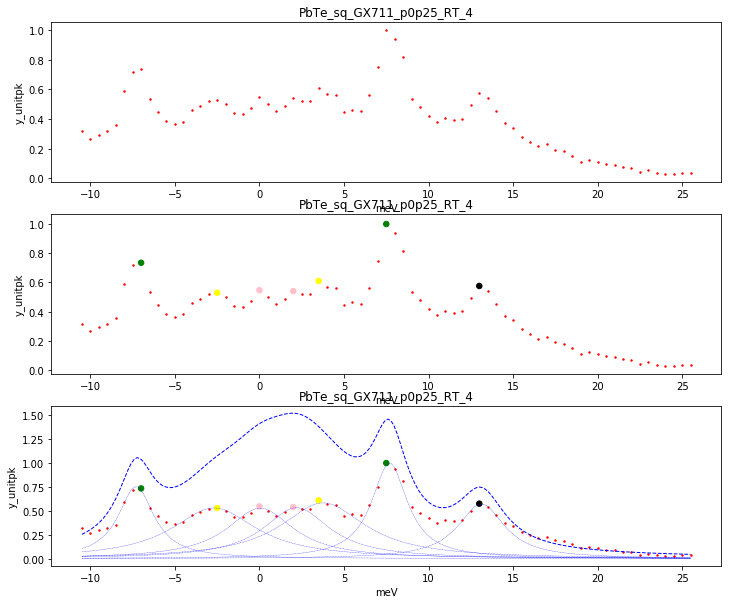

In [88]:
### plot
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
data.plot(ax1, run_mode='raw_data')
data.plot(ax2, run_mode='peak')
data.plot(ax3)
plt.show()

### best score was 0.00303455200624 ###


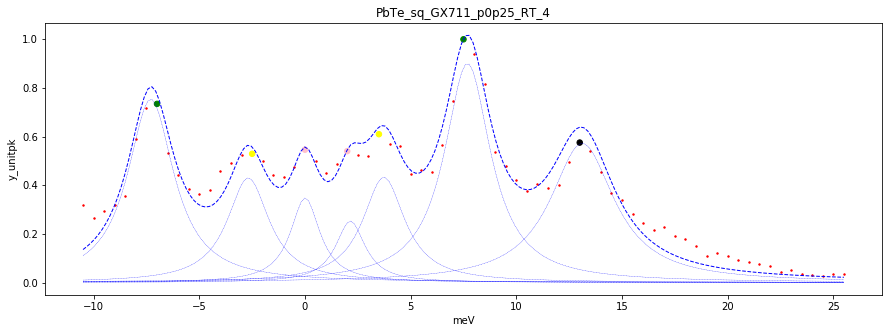

[[0.75405948620062391, -7.2959293320992238, 1.3298583939475708], [0.4304839085247476, -2.6840911098887816, 1.20960600905928], [0.34770936398847802, 0.0095644421092072468, 0.85058247711629908], [0.25290040286595072, 2.1482849389028154, 0.85058247711629908], [0.43329253831081771, 3.7315465252023587, 1.20960600905928], [0.90142348359057256, 7.6909445219731385, 1.3298583939475708], [0.5720798307851972, 13.120079504296687, 1.8498906756586533]]


In [424]:
### grid search
notice = False
grid_param = {'A':[1, 0.01], 'x0':[1, 0.5], 'd':[1, 0.01]}
data.make_grid_param(grid_param, notice=notice)
data.grid_search(notice=notice)

### plot
fig = plt.figure(figsize=(15, 5))
ax3 = fig.add_subplot(111)
data.plot(ax1, run_mode='raw_data')
data.plot(ax2, run_mode='peak')
data.plot(ax3)
plt.show()

### save best param
grid_best_param_lst = data.best_param_lst
print(grid_best_param_lst)

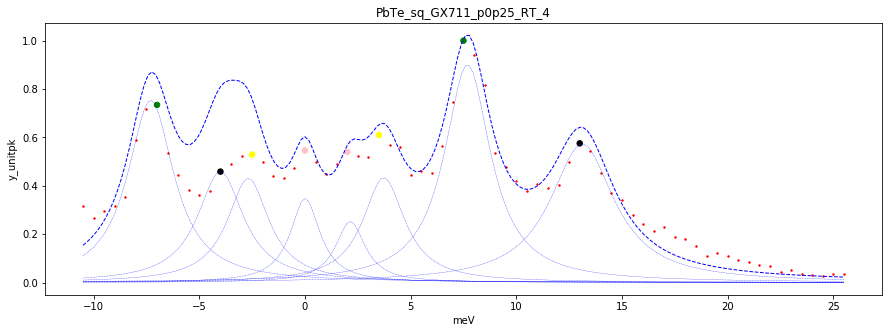

In [430]:
# data.add_peak(13, run_mode="test")
# data.add_peak(13, run_mode="add")
# print(data.peak_idx_lst)

### plot
fig = plt.figure(figsize=(15,5))
ax3 = fig.add_subplot(111)
data.plot(ax3)
plt.show()

In [421]:
### reset
data.best_param_lst = grid_best_param_lst
print(grid_best_param_lst)

[[0.70905948620062387, -7.2959293320992238, 1.3048583939475715], [0.46548390852474764, -2.6840911098887816, 1.3446060090592808], [0.35270936398847802, 0.0095644421092072468, 0.76558247711629901], [0.24790040286595072, 2.1482849389028154, 0.76558247711629901], [0.40829253831081769, 3.7315465252023587, 1.3446060090592808], [0.87642348359057254, 7.6909445219731385, 1.3048583939475715], [0.50707983078519714, 13.120079504296687, 1.754890675658654], [0.1331999999999999, 17.0, 1.2248583939475715]]


[[0.75405948620062391, -7.2959293320992238, 1.3298583939475708], [0.25860000000000005, -4.0, 1.3298583939475708], [0.4304839085247476, -2.6840911098887816, 1.20960600905928], [0.34770936398847802, 0.0095644421092072468, 0.85058247711629908], [0.25290040286595072, 2.1482849389028154, 0.85058247711629908], [0.43329253831081771, 3.7315465252023587, 1.20960600905928], [0.90142348359057256, 7.6909445219731385, 1.3298583939475708], [0.5720798307851972, 13.120079504296687, 1.8498906756586533]]
[[0.75405948620062391, -7.2959293320992238, 1.3298583939475708], [0.35860000000000003, -4.0, 1.3298583939475708], [0.4304839085247476, -2.6840911098887816, 1.20960600905928], [0.34770936398847802, 0.0095644421092072468, 0.85058247711629908], [0.25290040286595072, 2.1482849389028154, 0.85058247711629908], [0.43329253831081771, 3.7315465252023587, 1.20960600905928], [0.90142348359057256, 7.6909445219731385, 1.3298583939475708], [0.5720798307851972, 13.120079504296687, 1.8498906756586533]]


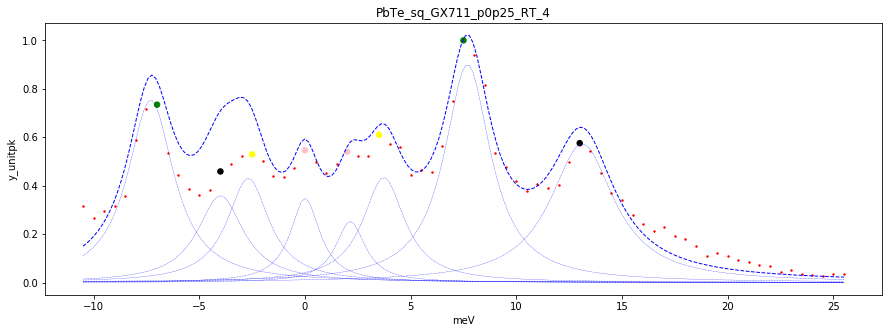

In [439]:
### by hand
# A -0  x0 - 1  d -2
# data.revise_best_param([[1,2,3],2,-0.1])
print(data.best_param_lst)
data.revise_best_param([1,0,-0.02])
print(data.best_param_lst)

### plot
fig = plt.figure(figsize=(15,5))
ax3 = fig.add_subplot(111)
data.plot(ax3)
plt.show()

In [238]:
### save
data.save("PbTe_sq_GX711_p0p25_RT_4.hdf5")

In [422]:
### load
data = ph_scat.Process(filename)
data.load("PbTe_sq_GX711_p0p25_RT_4.hdf5")

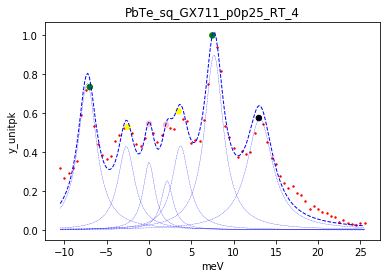

In [423]:
fig = plt.figure()
ax = fig.add_subplot(111)
data.plot(ax)
plt.show()

17.0 0.2282


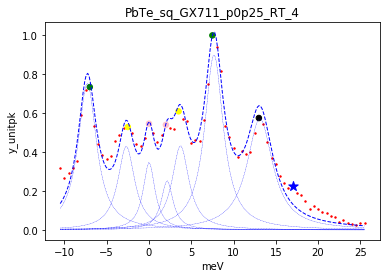

[[0.75405948620062391, -7.2959293320992238, 1.3298583939475708], [0.4304839085247476, -2.6840911098887816, 1.20960600905928], [0.34770936398847802, 0.0095644421092072468, 0.85058247711629908], [0.25290040286595072, 2.1482849389028154, 0.85058247711629908], [0.43329253831081771, 3.7315465252023587, 1.20960600905928], [0.90142348359057256, 7.6909445219731385, 1.3298583939475708], [0.5720798307851972, 13.120079504296687, 1.8498906756586533]]
[[0.75405948620062391, -7.2959293320992238, 1.3298583939475708], [0.4304839085247476, -2.6840911098887816, 1.20960600905928], [0.34770936398847802, 0.0095644421092072468, 0.85058247711629908], [0.25290040286595072, 2.1482849389028154, 0.85058247711629908], [0.43329253831081771, 3.7315465252023587, 1.20960600905928], [0.90142348359057256, 7.6909445219731385, 1.3298583939475708], [0.5720798307851972, 13.120079504296687, 1.8498906756586533], [0.22819999999999999, 17.0, 1.3298583939475708]]


In [268]:
data.add_peak(55, run_mode='test')
print(data.best_param_lst)
data.add_peak(55, run_mode='add')
print(data.best_param_lst)

[[0.75405948620062391, -7.2959293320992238, 1.3298583939475708], [0.4304839085247476, -2.6840911098887816, 1.20960600905928], [0.34770936398847802, 0.0095644421092072468, 0.85058247711629908], [0.25290040286595072, 2.1482849389028154, 0.85058247711629908], [0.43329253831081771, 3.7315465252023587, 1.20960600905928], [0.90142348359057256, 7.6909445219731385, 1.3298583939475708], [0.5720798307851972, 13.120079504296687, 1.8498906756586533], [0.22819999999999999, 17.0, 1.3298583939475708]]


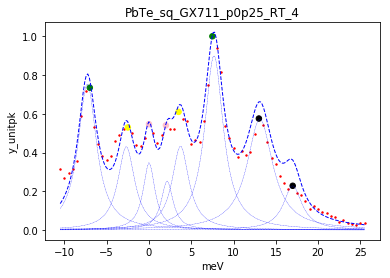

In [269]:
fig = plt.figure()
ax = fig.add_subplot(111)
data.plot(ax)
print(data.best_param_lst)
plt.show()